In [1]:
%matplotlib inline

```
---
title: Basic File Statistics
authors:
- John Laudun
date: 2015-07-22
reviewers:
- unknown
layout: default
---
```

For images:

    {% include figure.html src="../images/filename" caption="Caption to image" %}

For tables:
```
| First Header  | Second Header |
| ------------- | ------------- |
| Content Cell  | Content Cell  |
| Content Cell  | Content Cell  |
```

**Notes for Editors/Reviewers**

* While these scripts were begun under Python 2.7, they have been revised, and are now maintained, under Python 3.4. (I can build in an argument for Python 3.4, if that's advisable -- essentially all the modules for doing data analysis and/or NLP are now focused on development under Python 3.)
* The only thin I present here is text statistics and graphing of those statistics, which is all I proposed. I could also, either here or in a separate post, demonstrate how to work with the NLTK to the kinds of things described in the tutorial on AntConc within Python -- e.g., KWiC searches, synonyms, antonyms, word frequencies, etc. (I also have scripts for transforming bimodal graphs into single mode network projections. [TL;DR: NetworkX documentation is sometimes inpenetrable but it can be done.])
* While I initially titled this idea/tutorial "mesoanalysis" -- which is the eventual goal of this work, this tutorial seems better called **text stats**. I'm happy to change it back and/or happy to write a brief note, at the start or end, about how these first steps can be extended. (I'd like to write some additional tutorials doing just that.)

## Introduction

Other lessons in _The Programming Historian_ have focused on counting word frequencies in Python, on corpus analysis with AntConc, and on topic modeling with MALLET. If you have worked through those lessons, then you have experienced the shift from focusing on a single text while working within Python to attempting to understanding a much larger collection of texts while using tools that are readily available. There is, however, something to be said for keeping your workflow all within one environment. First, there is the simplicity of it. Second, there is the possibility of piping results from one process into another in a way that you control. And, finally, speaking of control, there is the opportunity it affords for you to embed within your tools, which is all programs are, all your ideas and assumptions and not the idea and assumptions of others.  

This tutorial is just a first step in the development of a fuller, richer Python toolchain, but by the end of it, you will be able to:

* read a collection/corpus of texts into a set of Python lists, where you will
* generate some basic statistics about those texts (here, length and lexicon), and
* output the results as a CSV file.

In a second section of the tutorial, you will:

* read the CSV file using Python's built-in modules to generate a graph as well as
* use the Python Data Analysis library, `pandas`, to create a dataframe to generate a graph

With these first few steps, you will have begun to establish for yourself what it means to write scripts that let you work with a number of texts at once and then, using your own sense of what needs to be done, deciding what kind of computational analysis needs to be done. The steps you take here will work with a few dozen texts as well as a few hundred texts, the great middle ground of collections that are frequently in the hands of historians and folklorists (like myself).

Please note that throughout this lesson, as I work through the actions of various functions I regularly check the output of those functions by printing them. I encourage readers to do the same thing. I find it very useful to understand how a function transforms input into an output, and, quite often, the key to understanding where something has gone wrong is in understanding what one function is handing off to another function. Readers should note that all of these `print` calls are temporary and do not appear in the completed script at the end of each section of the lesson.

## Getting Started

In this tutorial/lesson we are going to use both two Python modules that allow us to find things through pattern matching. One module, `glob`, allows us to tell our script to find all the text files in a directory; the other module, `re`, will then find patterns within those files using some broad regular expression parameters and we will use those results to construct a `csv` file to which we will save our results. We could simply print the results to our console or interactive environment -- I'm a big fan of the Jupyter notebook myself -- but once you get past a dozen or so files, it really becomes more useful to save our results into a file. We can use that file for a variety of purposes as we will see in the second section of this lesson.

Because we want to be able to use this script in a lot of different places, we are going to write it as stand-alone script. That means we are going to start with a header that not only makes sure to let our operating system know what language to use but also will tell most text editors which syntax highlighting to use (at least those that pay attention). After the header, we are going to provide a quick description of the script -- this can be more than a single line, but there are some rules you should follow for longer descriptions. Why write a description for a script we are writing for ourselves? One good reason is that we might one day loan this script to someone, and it's nice to have basic information embedded with it. Another reason, for me, is that I often *draft* my scripts in English and then slowly build them, so I like to start with a mission statement for a script. Sometimes I leave individual steps in, sometimes I don't, but, in general, the convention is to leave many such notes in a script, both as a reminder to yourself and as a stepping stone to others who may take your script and want to build on it. (And, really, one of the great things about writing code is how much you build on the work of others, and how much they, in turn, build on your work.)

Here's the start of our script:

In [15]:
#! /usr/bin/env python

"""textstats.py: basic statistics for a collection of text files"""

import glob, re

In addition to the two lines that declare, first, that this is a Python script, and, second, the name of the script and what it does, I have also included a third line. The reason is simple: we are going to need a bit of added functionality in our script, and, for that we will **`import`** two modules that are included with Python installations but are not loaded when you run Python unless you provide specific instructions to do so. The import instructions, by the way, could just as easily be written as two separate lines, and you will just as often see them written that way:

    import glob
    import re

I have chosen the more compact way of writing them here to introduce readers to the idea that there are different ways of writing Python code, and so long as they get the job done in a way acceptable to you, then that is acceptable. It doesn't matter which order you import these two modules, I just happen to import them in the order they get called in the code that follows, but that's really more an artifact of how I wrote this script: I wrote the **`glob`** part first and made sure it was doing what I wanted it to do, and then I added the regular expression funcationality of the **`re`** module. (We are going to do some testing along the way ourselves in this lesson, so we can see the results of various commands. Knowing the results of each of the steps in a larger program will make it easier for you to disassemble and re-assemble the code so you can get different, probably better, results.)

Let's take a moment to discuss the functionality of these two modules, just so we can be clear on what we can do with them. First up is the **`glob`** module. If the name doesn't seem intuitive at first glance, that's because it comes with quite a bit of history: it's short for "global command" where it was a separate program called upon by other programs to expand wildcard characters. (Searching this way is sometimes called "globbing.") The glob module simply makes that same functionality, the ability to specify a pattern for file names, within a Python script. In most instances, all you need to do is write `glob.glob(pathname)`. In our case, we are going to use glob to find the text files with which we want to work.

Our second import is Python's **`regular expression`** module, which is named **`re`** -- it's important that you use the proper name for a module, otherwise it will not be imported and you will not be the beneficiary of its functionality. In many cases, for modules with longer names, there is an established conversation for importing the module with a shortened name, to make writing code a bit easier. For instance, the popular Python data analysis module **`pandas`** module is almost always imported as **`pd`** and that is easy as writing:

    import pandas as pd

The regular expressions of the **`re`** module are going to let us do some quick clean up of our texts, as we will see in a moment. A more comprehensive explanation of regular expressions can be found in the lesson on ["Understanding Regular Expressions][ure] and on ["Cleaning OCR’d text with Regular Expressions"][cre]. For now, we need only consider regular expressions a way to search text with as much precision, or as much openness, as we like. We can transform the found text however we like.

[ure]: http://programminghistorian.org/lessons/understanding-regular-expressions
[cre]: http://programminghistorian.org/lessons/cleaning-ocrd-text-with-regular-expressions

## Building the Functionality We Want

Okay, so let's imagine we have a collection of texts. Perhaps it's a couple dozen, perhaps it's a couple hundred. No matter how small each individual text, the number of them makes them hard to hold them all in our head at the same time, especially if we are seeking to discern significant commonalities or differences which could be the first step in understanding the larger problem which are seeking to understand, whether it's a historical event or moment or a cultural idea or form. 

One place to begin, and where we are going to begin here, is to understand the size of the texts -- in a second script we are also going to look at the vocabulary involved (and we are going to discuss ways to discern terms of greater significance within such vocabularies). So, the first things to do is to get a word count for each text and, since it is so easy to do, while we are counting words, we will also get a sense of the number of unique words, so we can see whether or not the vocabulary expands as texts get bigger and, with enough texts, we might have a sense of the corresponding rate at which such an increase occurs.

So, our multi-step process looks like this:

1. get a text
2. count the number of words in it
3. count the number of unique words
4. compile a list where each line has the name of the file, the total words, and the total vocabulary

If you remember that those things may not necessarily occur in the same order when we are building a script, then the script below will not look too strange:

```
files = {}
for fpath in glob.glob("./assets/*.txt"):
    with open(fpath) as f:
         fixed_text = re.sub("[^a-zA-Z'-]"," ",f.read())
    files[fpath] = (len(fixed_text.split()),len(set(fixed_text.split())))
    print("Total Words:" , len(fixed_text.split()))
    print("Total Unique:",len(set(fixed_text.split())))
```

It will help, I think, if we walk through the script before building our own version of it. Who knows? Maybe in the process we will find a better, or at least a different, way to do the same thing? 

In brief, here's what each of the lines above does:

`files = {}` creates a dictionary

`for fpath in glob.glob("./assets/*.txt"):` opens the for loop that will build our list of texts and word counts -- don't worry if the iterator `fpath` not being defined upfront seems confusing, we'll talk more about iterators in a moment.

The `with` loop uses some regular expression code to 


It may look somewhat initimidating with a `with` loop running inside a `for` loop, but a simple way to think about it is inside out: *first*, we need to count the words in a given text, *and then* we need to compile a list of the texts and their word counts. In fact, working inside out is probably the best way to understand how this script works, and so we are going to begin with the `with` loop above, which is also where we use some regular expression magic, so we can discuss both those things at once.

### Fixing Words

Working inside out, we understand once we have a text file opened, using a `for` loop, we want to normalize its contents to make it easier to count things. Specifically, we want to make sure that capitalized and uncapitalized forms of the same form are considered the same and not as different items. E.g., "the" and "The" = "the". That seems reasonable, doesn't it? (Of course, if want to count them separately, that is also within your power and that is an important dimension of writing your own code: the myriad of small choices you can make that add up whatever model or theory or biases that are yours and not someone else's.)

One way to see what's going on in a longer script is to write and try out smaller pieces of it. That's what I would like to do with the regular expression part of this code, which is where all our interaction with our collection of texts begins. For simplicity's sake, I want to work a single, small file, so I can get a quick sense of my results. The second smallest text in the collection is only 109 words long:

> Me and my brothers would hear this story a lot from one of our neighbor’s parents, she said she was a fortune teller.  Supposedly, there was treasure buried by a stump and only a child could find it.  The treasure would rise up out of the ground and appear to the children.  The only time a child could find it is if they were playing by the stump, but if they left to go get help to get the treasure, when they came back for it, it was gone.  It had disappeared.  It didn’t pay for a grown up to go look for it because they wouldn’t find it. (ULS-006)

Let's see what happens when we run the regex pattern `[^a-zA-Z'-]` and ask Python module to substitute spaces:

In [16]:
one_fixed_text = re.sub("[^a-zA-Z']"," ",open('../assets/uls-006.txt').read())
print(one_fixed_text)

Me and my brothers would hear this story a lot from one of our neighbor's parents  she said she was a fortune teller   Supposedly  there was treasure buried by a stump and only a child could find it   The treasure would rise up out of the ground and appear to the children   The only time a child could find it is if they were playing by the stump  but if they left to go get help to get the treasure  when they came back for it  it was gone   It had disappeared   It didn't pay for a grown up to go look for it because they wouldn't find it 


That does a pretty good job. A more complex bit of regex would find all the *not* contractions and separate the two words, e.g., *wouldn't* would become *would* and *not* but since most of the contractions are in helper verbs that will not play much, in any, of a role in later analyses, I think we can let them stand.

The only other thing that remains is to make everything lower case in order to make counting words more consistent, and we can do that by simply appending the `.lower()` method to our code like this:

In [17]:
one_fixed_text = re.sub("[^a-zA-Z']"," ",open('../assets/uls-006.txt').read()).lower()
print(one_fixed_text)

me and my brothers would hear this story a lot from one of our neighbor's parents  she said she was a fortune teller   supposedly  there was treasure buried by a stump and only a child could find it   the treasure would rise up out of the ground and appear to the children   the only time a child could find it is if they were playing by the stump  but if they left to go get help to get the treasure  when they came back for it  it was gone   it had disappeared   it didn't pay for a grown up to go look for it because they wouldn't find it 


## Counting Words

Now that we have established a way to clean up our texts, we need to count the words in each text. This is an easy task in Python First, we split the text, which has so far remained a string, into a list of words:

In [ ]:
split_text = one_fixed_text.split()
print(split_text)

There are two reasons for splitting our text string into a list of words. The first has to do with a question you may have asked yourself: *why not get the length of the string itself?* The answer to this question comes in the form of the way that Python thinks about the make-up of strings: each item in a string, be it a character, a number, a punctuation mark, or a space, is an entity, and each one gets counted. If we break a string into a list of words, using the `split()` method and then ask how many items are in the list, we get back an accurate count:

In [35]:
print(len(one_fixed_text)) # returns a count of all the items in the string
print(len(split_text))     # returns a count of all the items in the list of words

542
109


The second reason for splitting our text string into a list of words is the incredibly useful `set` function that works magic on lists in Python, allowing us to quickly reduce the total number of words to a count of the individual words used. In the lines that follow, we will first get that set of words and then we will get a count of those words:

In [46]:
print(sorted(set(split_text)))
print(len(set(split_text)))

['a', 'and', 'appear', 'back', 'because', 'brothers', 'buried', 'but', 'by', 'came', 'child', 'children', 'could', "didn't", 'disappeared', 'find', 'for', 'fortune', 'from', 'get', 'go', 'gone', 'ground', 'grown', 'had', 'hear', 'help', 'if', 'is', 'it', 'left', 'look', 'lot', 'me', 'my', "neighbor's", 'of', 'one', 'only', 'our', 'out', 'parents', 'pay', 'playing', 'rise', 'said', 'she', 'story', 'stump', 'supposedly', 'teller', 'the', 'there', 'they', 'this', 'time', 'to', 'treasure', 'up', 'was', 'were', 'when', 'would', "wouldn't"]
64


As an aid to reading, I have `sorted` the set above, but that's only for my human eyes. It's important to remember that sets themselves are not ordered and that we do not need them to be if all we are interested in is the count of items. It's nice to know, however, that you can use sort on lists and sets whenever you need or like. Here's what our text would look like sorted:

In [50]:
print(sorted(split_text))

['a', 'a', 'a', 'a', 'a', 'a', 'and', 'and', 'and', 'appear', 'back', 'because', 'brothers', 'buried', 'but', 'by', 'by', 'came', 'child', 'child', 'children', 'could', 'could', "didn't", 'disappeared', 'find', 'find', 'find', 'for', 'for', 'for', 'fortune', 'from', 'get', 'get', 'go', 'go', 'gone', 'ground', 'grown', 'had', 'hear', 'help', 'if', 'if', 'is', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'left', 'look', 'lot', 'me', 'my', "neighbor's", 'of', 'of', 'one', 'only', 'only', 'our', 'out', 'parents', 'pay', 'playing', 'rise', 'said', 'she', 'she', 'story', 'stump', 'stump', 'supposedly', 'teller', 'the', 'the', 'the', 'the', 'the', 'the', 'there', 'they', 'they', 'they', 'they', 'this', 'time', 'to', 'to', 'to', 'to', 'treasure', 'treasure', 'treasure', 'up', 'up', 'was', 'was', 'was', 'were', 'when', 'would', 'would', "wouldn't"]


(I sometimes find even such basic abilities useful, when I am beginning work on a collection of texts.)

## Building a List of Word Counts

So far we have explored how we can use pattern matching to normalize a text string and how we can break a text string into a list of words so that we can get both a sense of the length of a text as well as its vocabulary. Some of that is quite interesting on its own, but where computers make things very easy is when they can do that same task on their own over a large number of texts in very little time.

Let's first recall the pieces of script we have already developed. The first is our code that will normalize our text:

    re.sub("[^a-zA-Z']"," ",open('../assets/uls-006.txt').read()).lower()

Python has a very efficient, and easy, way to handle opening a file, processing its contents, and then closing it: the `with` statement. Closing a file is terribly important. I try to imagine what my office would look like if I never closed a book: soon there would be nothing but great heaps of open books lying about. The `with` statement has its own built-in librarian, who tidies things up for you after your done. The logic of a `with` statement is simple:

```
with open("mytext.txt") as f:
    data = f.read()
    do something with data 
```

We can substitute our own code in this structure now:

In [56]:
with open('../assets/uls-006.txt') as f:
    fixed_text = re.sub("[^a-zA-Z']", " " , f.read().lower())

If you run the code above and add a third line, also indented, to the `with` statement, you will see the same results as above. 

With out `with` logic in place, we want to be able to feed a series of objects to it so that we can work through our entire collection of texts. The way to work through a collection in Python, as in other languages, is to use a `for` statement. The logic looks like this:

```
for thing in collection:
    do this
```

Implicit in this command is that the `for` loop is going to keep doing `this` until it runs out of `things`, at which point it stops. No more control logic is required us as writers. In our case, the collection is a folder (or directory) of texts. So the first thing we need to do is to turn that folder into a list of things on which `for` can work its magic. An easy way to do that is with the `glob` module:

In [54]:
file_list = glob.glob('../assets/*.txt')
print(file_list)

['../assets/anc-088.txt', '../assets/anc-089.txt', '../assets/anc-090.txt', '../assets/anc-091.txt', '../assets/lau-013.txt', '../assets/lau-014.txt', '../assets/loh-157.txt', '../assets/loh-158.txt', '../assets/loh-159.txt', '../assets/loh-160.txt', '../assets/loh-161.txt', '../assets/loh-162.txt', '../assets/loh-162b.txt', '../assets/loh-163.txt', '../assets/loh-164.txt', '../assets/loh-165.txt', '../assets/uls-001.txt', '../assets/uls-002.txt', '../assets/uls-003.txt', '../assets/uls-004.txt', '../assets/uls-005.txt', '../assets/uls-006.txt', '../assets/uls-007.txt']


Our first task, then, is to feed `for` this list. Remember, our logic is `for` **`thing`** `in` **`collection`**. In this instance **`thing`** is the item with which we want to do something within the for loop, and we get to choose the name. (It could be `thing`, if you like, but remember that choosing meaningful names is part of writing good code.) In this next bit of code, you'll note that I've chosen the names `fpath` and `f` for the two iterators. I like those two names because they are very straightforward, for me: the former is short for *filepath* which is what the `glob` module is in fact compiling into a list for me and `f` is shorthand for *file* which is what I want regex to work on.

In [59]:
for fpath in glob.glob("../assets/*.txt"):
    with open(fpath) as f:
         fixed_text = re.sub("[^a-zA-Z']", " " , f.read().lower())

At this point, we haven't really told the `for` loop what to do with all this information. For now, to keep things simply, we are going to build a dictionary. In Python, a dictionary is simply a container for pairs of items, where one item is the key and the other the value. (When you look up a term in the dictionary, the term is the key that allows you to access the value you seek, the definition.) For this dictionary, we are going to use the filepath as the key and we are going to pair it with a pair of numbers that we are going to store in a tuple. 

In [2]:
files = {}

for fpath in glob.glob("../assets/*.txt"):
    with open(fpath) as f:
         fixed_text = re.sub("[^a-zA-Z']", " " , f.read().lower())
    files[fpath] = [len(fixed_text.split()),len(set(fixed_text.split()))]

print(files)

{'../assets/lau-014.txt': [652, 204], '../assets/uls-005.txt': [188, 97], '../assets/anc-088.txt': [334, 142], '../assets/loh-159.txt': [279, 141], '../assets/loh-162b.txt': [192, 107], '../assets/loh-161.txt': [297, 129], '../assets/anc-089.txt': [153, 83], '../assets/lau-013.txt': [370, 170], '../assets/loh-157.txt': [367, 166], '../assets/uls-004.txt': [67, 49], '../assets/uls-001.txt': [117, 70], '../assets/anc-090.txt': [138, 72], '../assets/uls-003.txt': [136, 87], '../assets/loh-165.txt': [905, 277], '../assets/loh-164.txt': [1026, 315], '../assets/uls-006.txt': [109, 64], '../assets/loh-158.txt': [194, 107], '../assets/uls-007.txt': [234, 119], '../assets/anc-091.txt': [174, 103], '../assets/loh-162.txt': [331, 143], '../assets/loh-163.txt': [209, 113], '../assets/uls-002.txt': [122, 76], '../assets/loh-160.txt': [760, 285]}


## Saving the Results

Having compiled our texts and data points into a dictionary, we are close to done. We could, if we wanted to, simply run this script and grab the data from our console, or we could save it to a file:

In [3]:
with open("textStats.csv", "w") as fileOut:
    for fname in files:
        print("{},{},{}".format(fname, files[fname][0], files[fname][1]), file=fileOut)

This time we have placed a `for` loop within a `with` statement. The `for` loop iterates over our dictionary, `files`, printing first the file name, which is the key, and then using the standard way of getting values out of a dictionary: dictionary[key]. Because our value is a list and we want one value then the other, and not both, we use a list index, 0 for the first value and 1 for the second value, to place them in the proper sequence as we build each line. 

With this final step, we have a CSV file that we can import into a spreadsheet application for further analysis and/or visualization. 

Here's the completed script, commented to make it easy to port elsewhere:

In [ ]:
#! /usr/bin/env python

"""textstats.py: basic statistics for a collection of text files"""

import glob, re # import the two modules needed

files = {} # create an empty dictionary which we will populate with the for loop

# this for loop navigates to a directory, opens each file, normalizes the text
# and then counts words, saving the counts to a list 
for fpath in glob.glob("../assets/*.txt"):
    with open(fpath) as f:
         fixed_text = re.sub("[^a-zA-Z']", " " , f.read().lower())
    files[fpath] = [len(fixed_text.split()),len(set(fixed_text.split()))]

# save the results to a file
with open("textStats.csv", "w") as fileOut:
    for fname in files:
        print("{},{},{}".format(fname, files[fname][0], files[fname][1]), file=fileOut)

## A Simple Bar Chart

Or we could visualize it ourselves, using Python, and continue to build our own stack of scripts that do things exactly the way we want to do them. While we could certainly build visualization into our code above, for the purposes of imagining our own code stack, let's develop a separate script which will read a file and then create a bar chart.

As before, we are going to rely upon some extended functionality that will require us to import two modules: `numpy`, the Python library for expanded mathetmatical operations, and `matplotlib`, which is practically eponymous in its name. 

*Neither of these modules comes with the standard installation of Python, and so you are going to need to install them yourself. (Mac users may wish to see [my guide on using MacPorts][jl1], remembering to use `py34` instead of `py27` as I [note elsewhere][jl2].*

[jl1]: http://johnlaudun.org/20121230-macports-the-key-to-python-happiness/
[jl2]: http://johnlaudun.org/20150724-moving-to-python-3/

We will start, as we did before, with a hash-bang declaration this is a Python executable program, then a doc-string description of the program, and finally any modules we want to import. Because we used a single line last time, this time we are using two lines, just to prove that it doesn't matter:

In [2]:
#! /usr/bin/env python

"""textstatchart.py: a bar chart of basic statistics for a collection of text files"""

import numpy as np
import matplotlib.pyplot as plt

We are going to get a little fancy here and place the shorter bar, which will represent the vocabulary of a text, over the the bar that represents the length of the text. (As a folklorist, I am comfortable borrowing "lexicon" from linguists to refer to vocabulary, but you can you your own terminology.)

To make this script as easy for me to think about as possible, I started with the three things I knew each text had: its name, the overall word count, and the lexical word count. I set up three blank lists:

In [3]:
t_name = []
t_length = []
t_lexicon = []

With our lists created, it's time to start populating them. We first need to get our data out of the file we saved above, then we are going to break it into a series of strings within a list:

In [4]:
readFile = open('textStats.csv', 'r').read()
eachLine = readFile.split('\n')
print(eachLine)

['ANC-088,334,142', 'ANC-089,153,83', 'ANC-090,138,72', 'ANC-091,174,103', 'LAU-013,370,170', 'LAU-014,652,204', 'LOH-157,367,166', 'LOH-158,194,107', 'LOH-159,279,141', 'LOH-160,760,285', 'LOH-161,297,129', 'LOH-162,331,143', 'LOH-162B,192,107', 'LOH-163,209,113', 'LOH-164,1026,315', 'LOH-165,905,277', 'ULS-001,117,70', 'ULS-002,122,76', 'ULS-003,136,87', 'ULS-004,67,49', 'ULS-005,188,97', 'ULS-006,109,64', 'ULS-007,234,119']


We have successfully read our file into a list of strings. With that done, we are going, again, to turn to the power of computing languages to handle iterative tasks and populate each of our three lists -- `name`, `length`, and `lexicon` -- with the appropriate data. The `for` loop below splits each line in our original list and then uses the power of indexes to build our three new lists by appending the appropriate item to each one.

Recall that each line looks like this:

    ANC-088,334,142 

The first item is the filename and, in computerese, it's in the 0 position. The next item, the larger number, is the length of the text; it's in the first position. The final item is the lexical count in the second position. With that in mind, let's walk through the `for` loop:

`split = line.split(',')` tells the loop where to split each line: at the comma.

`t_name.append(split[0])` takes the first item in each line and adds it to the `name` list

`t_length.append(int(split[1]))` takes the second item in each line and adds it to the `length` list.

`t_lexicon.append(int(split[2]))` takes the third item in each line and adds it to the `lexicon` list.

When we run the code and then check results for asking for the first item in each of the created lists, we see we get the expected results. 

In [5]:
for line in eachLine:
    split = line.split(',')
    t_name.append(split[0])
    t_length.append(int(split[1]))
    t_lexicon.append(int(split[2]))
    
print(t_name[0],t_length[0],t_lexicon[0])

ANC-088 334 142


What comes next is telling `matplotlib` how to use this information to create a graph. Unfortunately, I have not found a way to make working with `matplotlib` easy and clear. It's a very powerful library and I suspect that most users establish a small portfolio of "recipes" and turn to the documentation of StackOverflow whenever they want to do something different. My best advice is to try the script here and feel free to tweak it as you see fit. 

Let's see if we can't walk through building a graph. The first thing to do is to determine what dimensions we need for the x and y axes. In our present case, how many texts are going to be on the x-axis and how high will the y-axis need to be in order to accommodate our longest text. This could be done by hand, but that makes the script less flexible: we would have to change the numbers by hand every time. Instead, we can easily determine the number of entries on the x-axis by simply getting the total number of lines. Our lines, with each line representing a single text, are in a list, and so we simply ask *how long is that list* with `len(eachLine)`. We store that value, `x_max`, for later use. (In the current script I add "1" to the overall length to give the x-axis a bit of extra room, but it isn't required.)

We now need to determine how high our y-axis needs to be, and to do that we need to find the longest text. We can sort that list in descending order -- `sorted(t_length, reverse=True)` -- and then store that value in `t_length_max`. (As you can see, I keep my variables very literal, making it easier to know right away what they are. It perhaps requires q few more key strokes as I type, but it more than makes up for it later when I've broken something and my confusion is already quite high.) However, I would rather not have my tallest bar reach all the way to the ceiling of my graph: I would like a little headroom. Because my texts are ranging in the hundreds, I'm going to round up to the nearest hundred. The easiest way to do that is to add a hundred, and then subtract the remainder if I was to divide by one hundred. The formula for doing so looks like this, and I have included a sample number so you can see how it works:

    t_length_max + 100 - (t_length_max % 100)
    
    t_length_max = 1026 + 100 = 1126
    t_length_max / 100 = 10 with a remainder of 26
    1126 - 26 = 1100 ==> y_max

We assign the value of this bit of math to `y_max`, knowing that in the future we won't ever have to worry about this, unless our texts decrease or increase radically in size, in which case we can just change 100 to 10 or to 1000 and we are good to go.

One final bit of fitting the graph to our data requires that we tell `matplotlib` where to place the bars: we need one spot on the x-axis for each bar. `numpy`'s range function does this for us, and, like the `x_max` above, I add one so that our first bar starts further in on the graph. (Try removing the `+ 1` from that line: the whole bar chart shifts to the left.)

Here's what all of that looks like in our script:

In [6]:
x_max = len(eachLine) + 1
t_length_max = sorted(t_length, reverse=True)[0] 
y_max = t_length_max + 100 - (t_length_max % 100)
x_loc = np.arange(len(eachLine)) + 1

What follows, to my mind, occasionally border on voodoo, but there's not much more to do but to follow the advice and practice of others. (I have stared at dozens of bar chart scripts in an attempt to grok the logic of `pyplot` but it mostly continues to elude me.) Since we want to show two bars simultaneously, we are actually going to create two plots, imaginatively labeled here `plot_len` and `plot_lex` -- they were `plot_1` and `plot_2` for a long time but that seemed too Seussian to be useful. Inside the parentheses, the script tells `pyplot` where to locate the bars on the x-axis, how tall they should be, how wide, where their bottoms should be located -- we are not stacking bars here, so both start at 0, and that one bar is to be red and the other yellow, and they both should be centered.

The next five lines dictate the dimensions of our graph, label the two axes, give the graph a title, and label each of the bars. Once all that is done, we tell `pyplot` to show the results, or, as you'll see in the completed script at the end of this section, you can save the graph to a file.

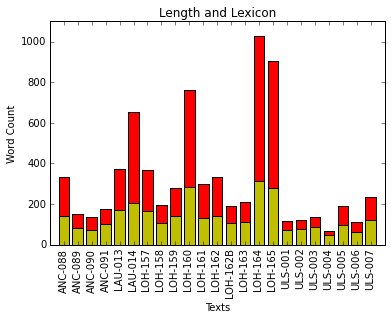

In [7]:
plot_len = plt.bar(x_loc, t_length, width=0.75, bottom=0, color='r', align='center')
plot_lex = plt.bar(x_loc, t_lexicon, width=0.75, bottom=0, color='y', align='center')

plt.axis([0, x_max, 0, y_max])
plt.xlabel('Texts')
plt.ylabel('Word Count')
plt.title('Length and Lexicon')
plt.xticks(x_loc, t_name, rotation='vertical') 

plt.show()

Here is the complete script for generating a bar graph with overlapping bars. If you want to create a graph with only one set of bars, all you need to do is delete, or comment out, the line for `plot_lex`. Please note that `plt.show()` has been commented out and the `plt.save()` command added: it will save a PNG file in the current directory.

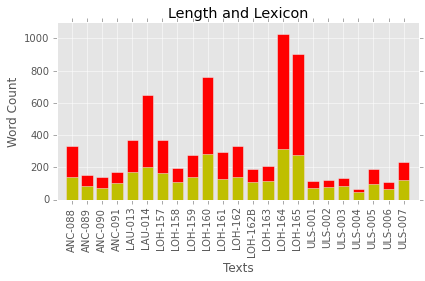

In [13]:
#! /usr/bin/env python

"""textstatchart.py: a bar chart of basic statistics for a collection of text files"""

import numpy as np
import matplotlib.pyplot as plt

# Create empty lists to be filled in next step
t_name = []
t_length = []
t_lexicon = []

# Read in the file and populate the lists
readFile = open('textStats.csv', 'r').read()
eachLine = readFile.split('\n')

for line in eachLine:
    split = line.split(',')
    t_name.append(split[0])
    t_length.append(int(split[1]))
    t_lexicon.append(int(split[2]))

# Some Graph Dimension Automation
x_loc = np.arange(len(eachLine)) + 1
x_max = len(eachLine) + 1
t_length_max = sorted(t_length, reverse=True)[0] 
y_max = t_length_max + 100 - t_length_max % 100

# The Two Plots
plot_1 = plt.bar(x_loc, t_length, width=0.75, bottom=0, color='r', align='center')
plot_2 = plt.bar(x_loc, t_lexicon, width=0.75, bottom=0, color='y', align='center')

# The Finishing Touches
plt.axis([0, x_max, 0, y_max])  # the mojo pays off here
plt.xlabel('Texts')
plt.ylabel('Word Count')
plt.title('Length and Lexicon')
plt.xticks(x_loc, t_name, rotation='vertical') 
plt.tight_layout()

# Save or Show, Save or Show?
#plt.show()
plt.savefig("bar_graph.png", dpi=300)

## Using a Dataframe to Plot

This plot is perfectly reasonable, but it would be better if it were sorted so that we could see if there was any trend as texts got bigger (or smaller). With three separate lists making up this plot, however, sorting by largest to smallest on the middle list is a bit complex. There is, however, another way to build this chart, and if you are willing to install `pandas` the Python Data Analysis Library, you will find that it opens the door to a lot more than bar charts and it makes handling tabular data much easier. In fact, I find `pandas` makes a lot of things easier, if only because its dataframes are so very similar to the kinds of tables that many scholars familiar with working with indices are used to using. I find them much more easy to think with (and through) than things like, say, tuples.

To make it easier to follow, let's start at the beginning, adding the `pandas` module to our list of imports:

In [8]:
#! /usr/bin/env python

"""tstatchart-df.py: a bar chart from a dataframe of text statistics"""

import numpy as np, pandas as pd, matplotlib as mpl

We now need to import data into a dataframe, here called `df`. (I know, very imagination, but it's somewhat of a convention to use `df`: you will see it in a lot of `pandas` scripts, so my lack of imagination is actually a nod to tradition -- important for a folklorist.) Please note that the original `csv` has been edited to include a header which shows up as column labels in our dataframe:

In [9]:
df = pd.read_csv("t_stats_labels.csv", ",")
print(df)

        text  length  lexicon
0    ANC-088     334      142
1    ANC-089     153       83
2    ANC-090     138       72
3    ANC-091     174      103
4    LAU-013     370      170
5    LAU-014     652      204
6    LOH-157     367      166
7    LOH-158     194      107
8    LOH-159     279      141
9    LOH-160     760      285
10   LOH-161     297      129
11   LOH-162     331      143
12  LOH-162B     192      107
13   LOH-163     209      113
14   LOH-164    1026      315
15   LOH-165     905      277
16   ULS-001     117       70
17   ULS-002     122       76
18   ULS-003     136       87
19   ULS-004      67       49
20   ULS-005     188       97
21   ULS-006     109       64
22   ULS-007     234      119


It's a very tidy setup with very little work on our part. One line of code. Sorting by the longest text is just as easy:

In [10]:
by_longest = df.sort(columns='length', ascending=False) 
print(by_longest)

        text  length  lexicon
14   LOH-164    1026      315
15   LOH-165     905      277
9    LOH-160     760      285
5    LAU-014     652      204
4    LAU-013     370      170
6    LOH-157     367      166
0    ANC-088     334      142
11   LOH-162     331      143
10   LOH-161     297      129
8    LOH-159     279      141
22   ULS-007     234      119
13   LOH-163     209      113
7    LOH-158     194      107
12  LOH-162B     192      107
20   ULS-005     188       97
3    ANC-091     174      103
1    ANC-089     153       83
2    ANC-090     138       72
18   ULS-003     136       87
17   ULS-002     122       76
16   ULS-001     117       70
21   ULS-006     109       64
19   ULS-004      67       49


Now all that needs to be done is to feed this data to `matplotlib` to generate our graph. As with our previous example, we have various specs to feed `pyplot`. We've already sorted the dataframe by the longest text, in the commands below we draw the two bars side-by-side and then determine the title, etc. It's important to note here that size in `mpl` is actually in inches and that you can add DPI if you like. Working in Jupyter notebook, I tend to use the figsize as a way to determine the best aspect ratio and then I use `plt.save()` to set the DPI for my figure. Everything else will be a bit clearer, having waded through the initial plotting above. 

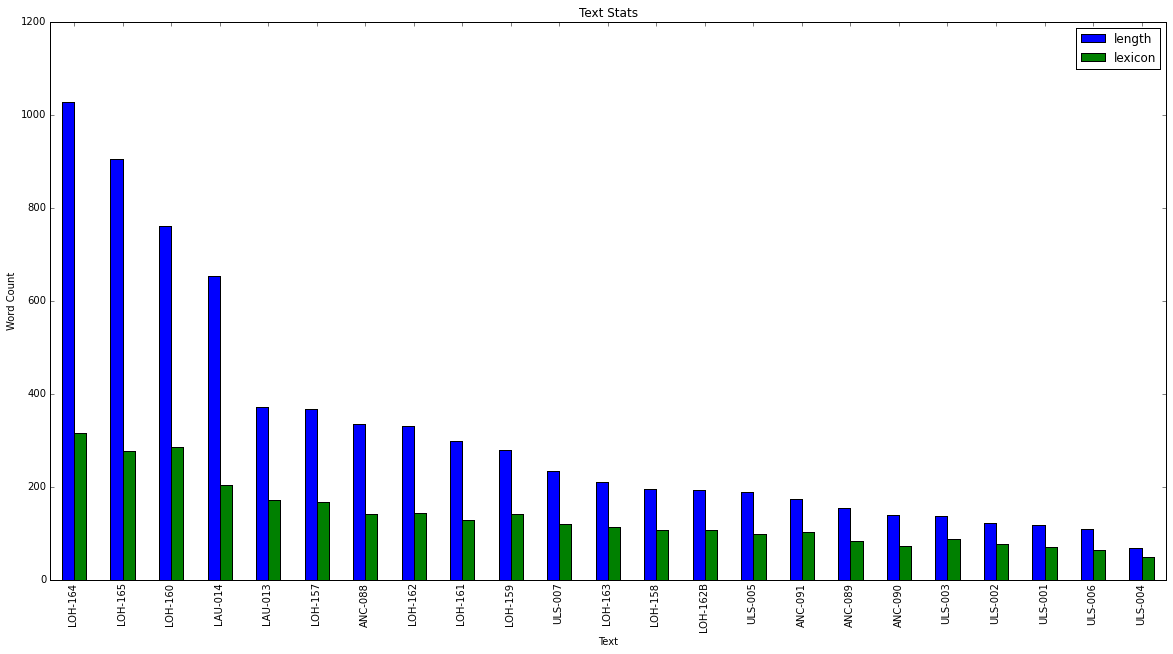

In [11]:
ax = by_longest[['length','lexicon']].plot(kind='bar', 
                                           title ="Text Stats",
                                           figsize=(20,10),
                                           legend=True)
ax.set_xlabel("Text")
ax.set_ylabel("Word Count")
ax.set_xticklabels(list(by_longest['text'])) 
mpl.pyplot.show()

Here is the complete script. Note that I added a "style" just before we start drawing the graph. There are a number of these available, and users are, of course, free to create their own.

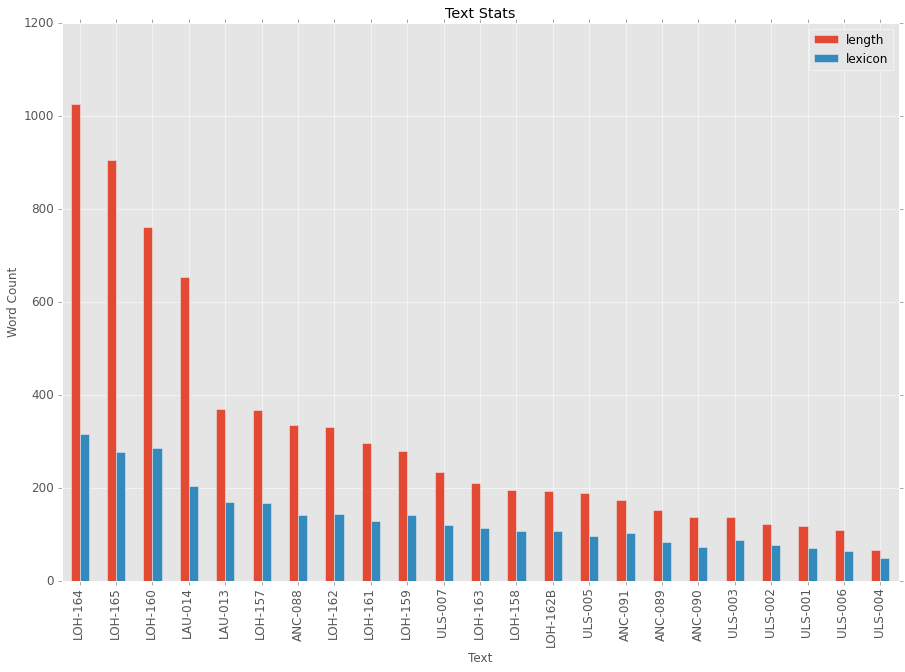

In [12]:
#! /usr/bin/env python

"""tstatchart-df.py: a bar chart from a dataframe of text statistics"""

import numpy as np, pandas as pd, matplotlib as mpl

# Import data from file into dataframe
df = pd.read_csv("t_stats_labels.csv", ",")

# Sort by the longest text
by_longest = df.sort(columns='length', ascending=False) 

# Draw the graph (note use of ggplot)
mpl.style.use('ggplot')
ax = by_longest[['length','lexicon']].plot(kind='bar', 
                                           title ="Text Stats",
                                           figsize=(15,10),
                                           legend=True,
                                           fontsize=12)
ax.set_xlabel("Text",fontsize=12)
ax.set_ylabel("Word Count",fontsize=12)
ax.set_xticklabels(list(by_longest['text'])) 
mpl.pyplot.show()

## Putting It All Together

By focusing on some simple initial tasks, like understanding how long the texts are in a collection and how many unique words each texts uses, we have also made good use of two kinds of control structures in Python, the `with` statement and the `for` loop. We have dipped our toes in what is, arguably, one of the trickiest libraries to master in Python, `matplotlib` as well as seen the incredible ease of use, both for compiling information as well as graphing that can be found in `pandas`. All of this work relies, of course, on the good grace of `glob` to make it easy to ingest texts into our code base and `regex` both to find and/or transform words based on a few simple patterns. More complex kinds of analysis introduce stop word lists and various statistical ways of compressing the information found in texts as the numbers within a collection grow beyond a few dozen and into something more like a few hundred.

## Suggested Reading

Like a lot of newbie Python coders, my first introduction to the language was _[Learning Python][]_ by Mark Lutz and David Ascher (O'Reilly, 2006), but I have learned quite a bit over the years from StackOverflow, where I read a lot and also ask the occasional question. ([This is me on SO.][so]) If you are interested in taking next steps in regex, Jeffrey Friedl's _[Masting Regular Expressions][]_ is a good place to start, and if you're ready to leap into natural language processing, please do check out _[Natural Language Processing with Python][]_ written by the authors of the module, Steven Bird, Ewan Klein, and Edward Loper. (And if you really, really want to know more about `matplotlib`, I have found Duncan McGreggor's _[Mastering matplotlib][]_ fairly useful. 

*All the links above are to the O'Reilly pages, where you can purchase the electronic and/or print versions of the books. The electronic versions are available in PDF, Mobi, and ePub formats and are available for download in perpetuity as well as automagical syncing to a Dropbox account.*

John Laudun is Professor of English at the University of Louisiana at Lafayette. As a folklorist, his work focuses on forms of expression and ideation embedded within a particular culture. His history of one such instance, _The Amazing Crawfish Boat_ will be published by the University Press of Mississippi in early 2016. More information can be found on [his website][jlo].

[Learning Python]: http://shop.oreilly.com/product/0636920028154.do
[so]: http://stackoverflow.com/users/1457672/john-laudun
[Masting Regular Expressions]: http://shop.oreilly.com/product/9780596528126.do
[Natural Language Processing with Python]: http://shop.oreilly.com/product/9780596516499.do
[Mastering matplotlib]: https://www.packtpub.com/big-data-and-business-intelligence/mastering-matplotlib
[jlo]: http://johnlaudun.org/